In [ ]:
import os
import scanpy as sc
import pandas as pd
import numpy as np

# Load dataset
rna = sc.read_h5ad("data/raw/bone_marrow_mononuclear.h5ad")
print(rna)

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'


In [28]:
rna.obs

,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,...,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
TAGTTGTCACCCTCAC-1-s1d1,1.061008,1508.0,1022,0.453484,S,4031.0,5400,0.746481,0.003473,0.642468,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.604230,1655.0,1081,0.455631,G2M,8636.0,19266,0.448251,0.003126,1.220679,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.650069,7230.0,3304,2.435348,G2M,4674.0,6177,0.756678,0.001284,0.692573,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.812274,1108.0,793,0.347226,G2M,2803.0,4019,0.697437,0.000714,0.633838,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.674770,1851.0,1219,0.534205,G2M,1790.0,2568,0.697040,0.003352,0.727660,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAACCGCGTTTGAGGC-12-s4d9,2.777778,504.0,414,0.423378,G2M,10551.0,9280,1.136961,0.000000,0.746048,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
TGACTTAAGTTCCCGT-12-s4d9,1.199400,667.0,506,0.540696,S,13055.0,11980,1.089733,0.001379,0.609774,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
GCTGTACCACCGTTCC-12-s4d9,7.535642,491.0,395,0.434772,G2M,9689.0,7968,1.215989,0.001342,0.491691,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
ACACTTGCAACTAGAA-12-s4d9,2.666667,900.0,675,0.794887,S,21123.0,23886,0.884326,0.001846,0.851667,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker


In [29]:
rna.obsm["ATAC_gene_activity"]

<69249x19039 sparse matrix of type '<class 'numpy.float32'>'
	with 375051939 stored elements in Compressed Sparse Column format>

In [30]:
rna.X

<69249x129921 sparse matrix of type '<class 'numpy.float32'>'
	with 325339757 stored elements in Compressed Sparse Row format>

In [60]:
barcode_to_cell_type = rna.obs["cell_type"].reset_index()
barcode_to_cell_type = barcode_to_cell_type.rename(columns={"index": "barcode"})

/tmp/ipykernel_3621346/261632145.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barcode_to_cell_type.groupby("cell_type").count()


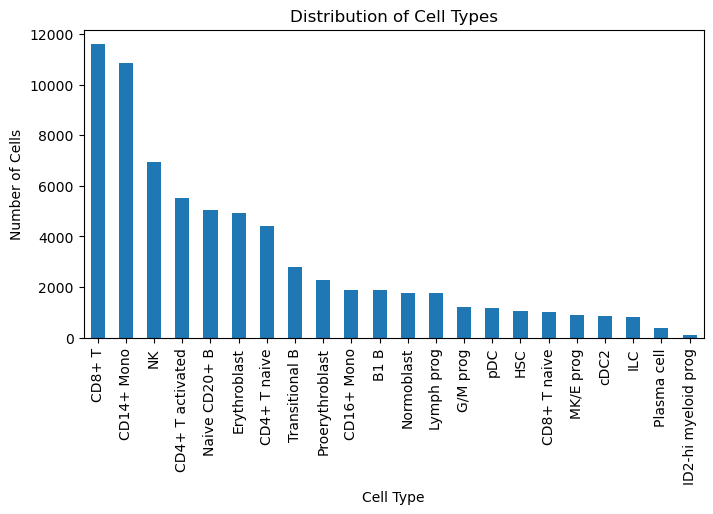

In [40]:
barcode_to_cell_type.groupby("cell_type").count()

import matplotlib.pyplot as plt
#histogram of cell types
plt.figure(figsize=(8,4))
barcode_to_cell_type["cell_type"].value_counts().plot(kind="bar")
plt.title("Distribution of Cell Types")
plt.xlabel("Cell Type")
plt.ylabel("Number of Cells")
plt.xticks(rotation=90)
plt.show()

In [123]:
rna.obs["DonorNumber"].value_counts()

DonorNumber
donor1     18467
donor8      9876
donor3      8604
donor10     6781
donor2      6740
donor4      6111
donor5      4895
donor9      4325
donor7      1771
donor6      1679
Name: count, dtype: int64

In [135]:
print("barcode_to_cell_type index name:", barcode_to_cell_type.index.name)
print("barcode_to_cell_type columns:", barcode_to_cell_type.columns.tolist()[:10])
print("example obs barcode:", rna.obs_names[0])
print("example mapping index:", barcode_to_cell_type.index[:3].tolist())


barcode_to_cell_type index name: None
barcode_to_cell_type columns: ['barcode', 'cell_type']
example obs barcode: TAGTTGTCACCCTCAC-1-s1d1
example mapping index: [0, 1, 2]


In [139]:
cell_type = "CD8+ T"

gene_mask = (rna.var["feature_types"].values == "GEX")
peak_mask = (rna.var["feature_types"].values == "ATAC")
gene_names = rna.var_names[gene_mask].to_list()
peak_names = rna.var_names[peak_mask].to_list()

donors = rna.obs["DonorNumber"].unique()
print("Unique donors:", donors)

for donor_id in donors:
    print(f"Processing donor: {donor_id}")

    combined_mask = (
        (rna.obs["DonorNumber"].values == donor_id) &
        (rna.obs["cell_type"].values == cell_type)
    )

    n = int(combined_mask.sum())
    print(f"  - Number of {cell_type} cells: {n}")
    if n == 0:
        continue

    cell_barcodes = rna.obs_names[combined_mask]
    X = rna.layers["counts"][combined_mask, :]

    X_rna  = X[:, gene_mask]
    X_atac = X[:, peak_mask]

    rna_df  = pd.DataFrame(X_rna.todense(),  columns=gene_names, index=cell_barcodes)
    atac_df = pd.DataFrame(X_atac.todense(), columns=peak_names, index=cell_barcodes)

    sample_dir = f"data/raw/bone_marrow_cd8_t/{donor_id}"
    os.makedirs(sample_dir, exist_ok=True)

    rna_df.to_parquet(f"{sample_dir}/scRNA_seq_raw.parquet")
    atac_df.to_parquet(f"{sample_dir}/scATAC_seq_raw.parquet")


Unique donors: ['donor1', 'donor2', 'donor3', 'donor4', 'donor5', 'donor6', 'donor7', 'donor10', 'donor8', 'donor9']
Categories (10, object): ['donor1', 'donor2', 'donor3', 'donor4', ..., 'donor7', 'donor8', 'donor9', 'donor10']
Processing donor: donor1
  - Number of CD8+ T cells: 1653
Processing donor: donor2
  - Number of CD8+ T cells: 1632
Processing donor: donor3
  - Number of CD8+ T cells: 1398
Processing donor: donor4
  - Number of CD8+ T cells: 230
Processing donor: donor5
  - Number of CD8+ T cells: 752
Processing donor: donor6
  - Number of CD8+ T cells: 488
Processing donor: donor7
  - Number of CD8+ T cells: 110
Processing donor: donor10
  - Number of CD8+ T cells: 432
Processing donor: donor8
  - Number of CD8+ T cells: 4089
Processing donor: donor9
  - Number of CD8+ T cells: 805
